In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import image


ModuleNotFoundError: No module named 'image'

File count: 302
File count: 301
File count: 317
File count: 342
File count: 301
File count: 314
File count: 306
File count: 330
[13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 

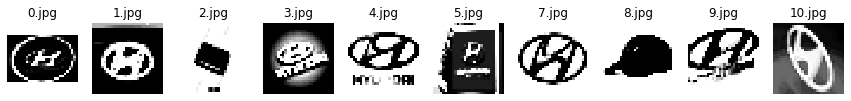

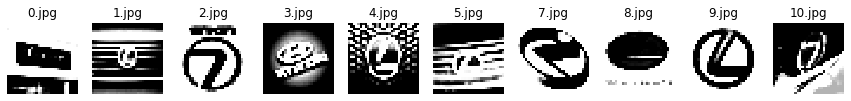

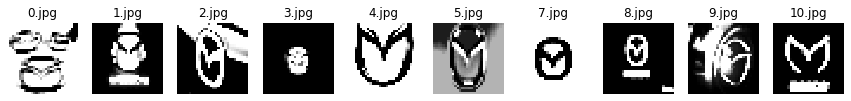

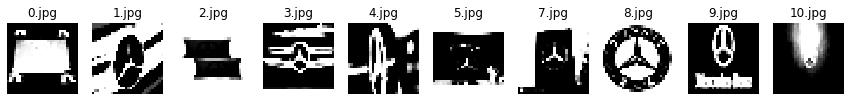

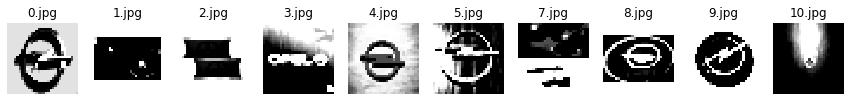

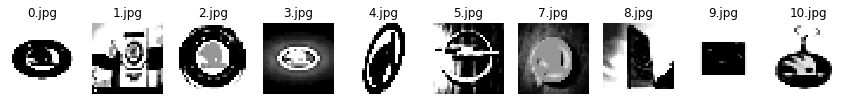

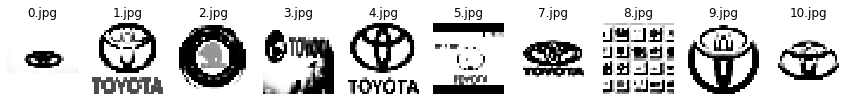

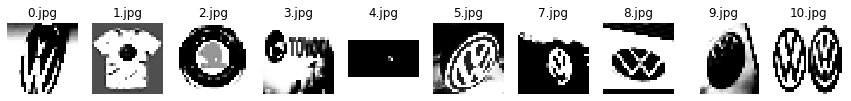

In [13]:
# before running, make sure you have files a.jpg, b.jpg, c.jpg, d.jpg in the folder containing this notebook
# check: you should see the converted images of your files plotted below
from PIL import Image, ImageEnhance # importing some packages to handle images
from matplotlib import image

digit_images, digit_arrays = {}, {}
brands_dict = {}
#parent_dir = "mercedes"
parent_dir = ["hyundai","lexus","mazda","mercedes","opel","skoda","toyota","volkswagen"]
for current_dir in parent_dir:
    # Jaime's directory: C:\Users\Luna\Desktop\MAT_180_FINAL_PROJECT\MAT_180_ML_Projects\art-gallery-location-analysis\data\trainning_set\\
    # Nic's directory: C:\Users\LaudeJarm\Downloads\archive\Car_Brand_Logos\Train\\
    directory = r"C:\Users\LaudeJarm\Downloads\archive\Car_Brand_Logos\Train\\" + f"{current_dir}\\"

    count = 0
    for path in os.listdir(directory):
        # check if current path is a file
        if os.path.isfile(os.path.join(directory, path)):
            count += 1
    print('File count:', count)

    num_elements = [str(x) for x in range(count)]
    for i in num_elements: #for each i this converts the image to an 8 by 8 matrix with values from 0 to 16
        #print(i)
        digit_image = Image.open(directory + f"{i}.jpg") # opening your image
        if digit_image.mode == 'RGB':
            digit_image = digit_image.resize((30,30)) # resize to 8 by 8 pixels
            digit_image = ImageEnhance.Contrast(digit_image).enhance(10).convert('LA') # preprocess (contrast & grayscale)
            digit_images[i] = digit_image
            digit_arr = np.asarray(digit_images[i])[:,:,0] # create as 3-tensor but only need 0 slice matrix
            digit_arr = (255 - digit_arr) # had opposite grayscale convention, need to correct it
            digit_arr = digit_arr/255*16 # had entries up to 255 but we only want it up to 16 
            digit_arr = np.rint(digit_arr)-3 # rounding to integer values
            digit_arr = digit_arr.clip(min = 0) # attempting to get rid of background darkness
            #digit_arrays[i] = digit_arr
            digit_arrays[i] = digit_arr.reshape(1,-1)
    brands_dict[current_dir] = digit_arrays[i]
    _, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 10))
    for ax, image, label in zip(axes, digit_images.values(), digit_images.keys()):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"{label}.jpg")
print(brands_dict['hyundai'][0])